In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)       # (506, 13)
print(boston.feature_names)  # Column names
print(boston.DESCR)        # brief desc.
df = pd.DataFrame(boston.data)
print(df.head(5))


C:\Users\ACER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to 

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
df.columns = boston.feature_names
print(df.head(5))
      

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [3]:
df['PRICE'] = boston.target
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [6]:
X = df.drop('PRICE', axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, df.PRICE, test_size = 0.33, # Test data (33%)
        random_state = 42) # assign random_state to any value, to get same samples on each fresh run


In [7]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
pred_test = lm.predict(X_test)

Text(0, 0.5, 'Predicted Price')

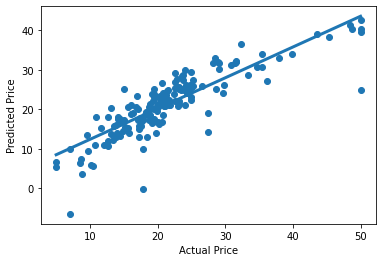

In [8]:
plt.scatter(y_test,pred_test)
plt.plot(np.unique(y_test), 
      np.poly1d(np.polyfit(y_test, pred_test, 1))(np.unique(y_test)),
      linewidth = 3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [9]:
coeff_df = pd.DataFrame(X_train.columns, lm.coef_)
print(coeff_df)
mse = sklearn.metrics.mean_squared_error(y_test, pred_test)
print(mse)

                  0
-0.128750      CRIM
 0.037823        ZN
 0.058211     INDUS
 3.238668      CHAS
-16.169812      NOX
 3.902051        RM
-0.012851       AGE
-1.422224       DIS
 0.234854       RAD
-0.008213       TAX
-0.928722   PTRATIO
 0.011770         B
-0.547566     LSTAT
20.724023437339646


In [10]:
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal Width and Sepal Height
Y = iris.target       # Species -> Setosa, Versicolor, Virginic

In [11]:
lm = linear_model.LogisticRegression(C=1e5)
lm.fit(X, Y)
      
# Range of X and Y axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# Step size in the mesh
h = .02  
# Creating Mesh Grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

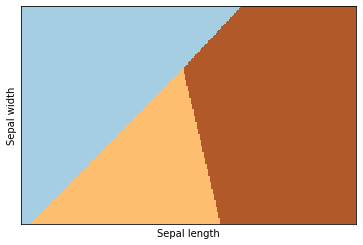

In [12]:
Z = lm.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Labeling
plt.figure(1, figsize=(4, 3))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(());
plt.yticks(());
plt.show()
                        


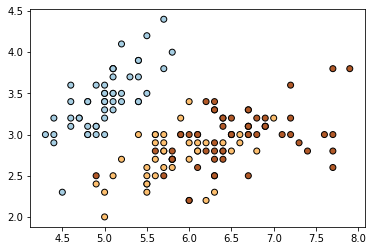

In [13]:
plt.scatter(X[:, 0], X[:, 1],c=Y, edgecolors='k', cmap=plt.cm.Paired)

In [18]:
 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('data3.csv')
X = df.values[:, 1:5]   # Other features
Y = df.values[:,0]  # Target
# Splitting data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, 
                                                random_state = 42)

In [19]:
# Gini Impurity
lm_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                              max_depth=3, 
                              min_samples_leaf=5) # min. samples req. at leaf node
lm_gini.fit(X_train, y_train)
y_pred = lm_gini.predict(X_test)
# Information Gain
lm_ig = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                              max_depth=3, 
                              min_samples_leaf=5)
lm_ig.fit(X_train, y_train)
y_pred_ig = lm_ig.predict(X_test)
                              

In [20]:
 
print(y_pred)
print(y_pred_ig)
                              


['L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'L' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L'
 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R'
 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R'
 'R' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'R'
 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R'
 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'R']
['L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'R' 'R' 'L'
 'R' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'L' 'L' 'R' 'L' 

In [21]:
print("Accuracy of Gini Impurity model: ", 
      accuracy_score(y_test, y_pred) * 100)
print("Accuracy of Information Gain model: ", 
      accuracy_score(y_test, y_pred_ig) * 100)
                              

Accuracy of Gini Impurity model:  71.27659574468085
Accuracy of Information Gain model:  71.27659574468085
